In [13]:
import sys
import os
from dotenv import load_dotenv
load_dotenv()
sys.path.append(os.getenv("PATH_CUSUM"))

import numpy as np
from source.generator.change_point_generator import ChangePointGenerator
from source.detector.cusum import KS_CUM_Detector

# Abrupt Shift

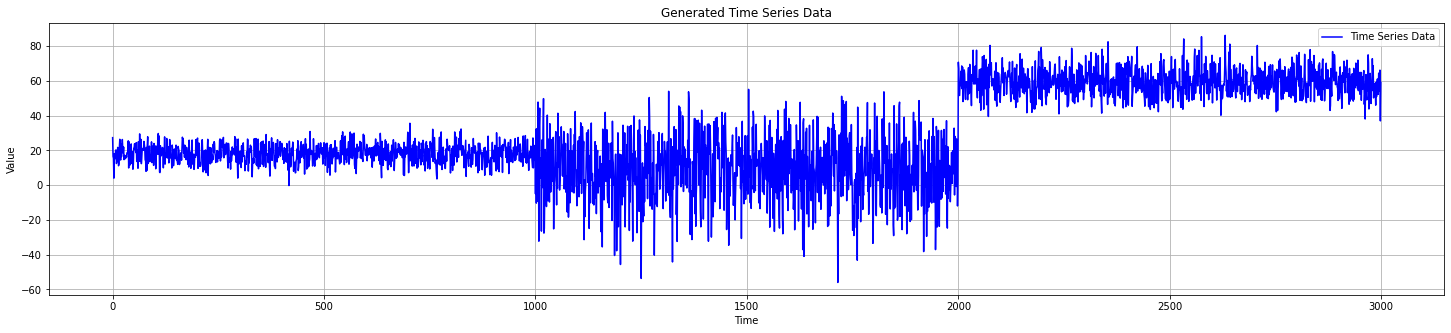

In [21]:
# Set seed
np.random.seed(11)

# Generate time series data with change points
generator = ChangePointGenerator(num_segments=3, segment_length=1000, change_point_type='sudden_shift')
generator.generate_data()

# Plot the generated data
generator.plot_data()

# KS-Test

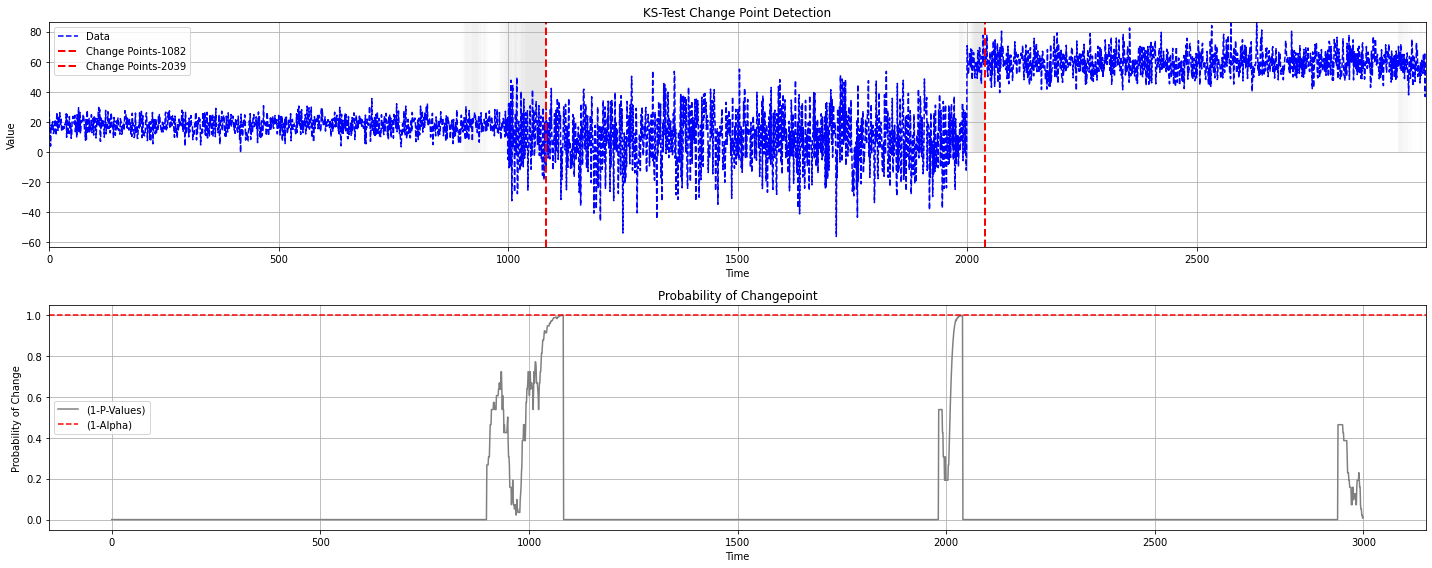

In [23]:
ks_detector = KS_CUM_Detector(window_pre=600, window_post=300, alpha=0.001)
ks_statistics , p_values, change_points = ks_detector.detect_change_points(np.array(generator.data))
ks_detector.plot_change_points(generator.data, change_points, p_values)